In [1]:
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.getcwd()))
print(SCRIPT_DIR)
sys.path.append(os.path.normpath(SCRIPT_DIR))
# sys.path.append(os.path.normpath(os.path.join(SCRIPT_DIR, PACKAGE_PARENT)))

/work/tianjunm/monaural-source-separation


In [2]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
%load_ext autoreload
%autoreload 2

import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.io.wavfile
from scipy.fftpack import dct
import scipy.signal
import IPython.display
import pandas as pd

import json
import datasets.setup
import models.setup
import loss_functions.setup

### Loading the dataset

In [26]:
config_path = '/work/tianjunm/monaural-source-separation/experiments/hyperparameter/csa_lstm/000.json'
with open(config_path) as f:
    config = json.load(f)

In [4]:
train_dataloader = datasets.setup.prepare_dataloader(config, 'train')

val_dataloader = datasets.setup.prepare_dataloader(config, 'val')

<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...


 14%|█▍        | 14/99 [00:00<00:00, 135.69 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...


<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...


 48%|████▊     | 16/33 [00:00<00:00, 125.25 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...


<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/banjo.csd ...


  0%|          | 0/98 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_banjo> computational sequence ...


<Success>: <cut_normalized_16000_banjo> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_banjo> computational sequence ...
<Success>: <cut_normalized_16000_banjo> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/waterfall.csd ...


  7%|▋         | 5/75 [00:00<00:01, 46.78 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_waterfall> computational sequence ...


<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/ukulele.csd ...


 18%|█▊        | 17/97 [00:00<00:00, 155.80 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...


<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...


 50%|█████     | 50/100 [00:00<00:00, 454.22 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_motorboat> computational sequence ...


<Success>: <cut_normalized_16000_motorboat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_motorboat> computational sequence ...
<Success>: <cut_normalized_16000_motorboat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fireworks.csd ...


 13%|█▎        | 13/98 [00:00<00:01, 73.82 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fireworks> computational sequence ...


<Success>: <cut_normalized_16000_fireworks> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fireworks> computational sequence ...
<Success>: <cut_normalized_16000_fireworks> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/acoustic_guitar.csd ...


 26%|██▌       | 26/101 [00:00<00:00, 215.47 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...


<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/piano.csd ...


 26%|██▋       | 26/99 [00:00<00:00, 231.04 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...


<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/fixedwing_aircraft_airplane.csd ...


  1%|          | 1/98 [00:00<00:10,  9.14 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...


<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence ...
<Success>: <cut_normalized_16000_fixedwing_aircraft_airplane> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bird.csd ...


 12%|█▏        | 12/100 [00:00<00:01, 72.00 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_bird> computational sequence ...


<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.csd ...


 24%|██▍       | 12/50 [00:00<00:00, 67.75 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...


<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/keys_jangling.csd ...


  7%|▋         | 2/28 [00:00<00:01, 17.93 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_keys_jangling> computational sequence ...


<Success>: <cut_normalized_16000_keys_jangling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_keys_jangling> computational sequence ...
<Success>: <cut_normalized_16000_keys_jangling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/flute.csd ...


 25%|██▌       | 26/102 [00:00<00:00, 223.31 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_flute> computational sequence ...


<Success>: <cut_normalized_16000_flute> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_flute> computational sequence ...
<Success>: <cut_normalized_16000_flute> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/rain.csd ...


 15%|█▌        | 15/100 [00:00<00:00, 107.57 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_rain> computational sequence ...


<Success>: <cut_normalized_16000_rain> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_rain> computational sequence ...
<Success>: <cut_normalized_16000_rain> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bass_guitar.csd ...


 15%|█▍        | 14/96 [00:00<00:00, 117.19 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...


<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...


 50%|█████     | 40/80 [00:00<00:00, 399.31 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...


<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cowbell.csd ...


  1%|          | 1/100 [00:00<00:11,  8.48 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_cowbell> computational sequence ...


<Success>: <cut_normalized_16000_cowbell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cowbell> computational sequence ...
<Success>: <cut_normalized_16000_cowbell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/telephone_bell_ring.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_telephone_bell_ring> computational sequence ...


<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/applause.csd ...


 13%|█▎        | 13/99 [00:00<00:01, 78.63 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...


<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_singing.csd ...


 28%|██▊       | 28/100 [00:00<00:00, 243.77 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_male_singing> computational sequence ...


<Success>: <cut_normalized_16000_male_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_singing> computational sequence ...
<Success>: <cut_normalized_16000_male_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snoring.csd ...


 40%|████      | 40/100 [00:00<00:00, 361.03 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_snoring> computational sequence ...


<Success>: <cut_normalized_16000_snoring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snoring> computational sequence ...
<Success>: <cut_normalized_16000_snoring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/raindrop.csd ...


  2%|▏         | 2/99 [00:00<00:06, 14.47 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...


<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snare_drum.csd ...


 28%|██▊       | 28/100 [00:00<00:00, 150.96 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...


<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/firetruck_siren.csd ...


 64%|██████▍   | 64/100 [00:00<00:00, 524.22 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_firetruck_siren> computational sequence ...


<Success>: <cut_normalized_16000_firetruck_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_firetruck_siren> computational sequence ...
<Success>: <cut_normalized_16000_firetruck_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/baby_laughter.csd ...


 67%|██████▋   | 35/52 [00:00<00:00, 348.37 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_baby_laughter> computational sequence ...


<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tearing.csd ...


 42%|████▏     | 29/69 [00:00<00:00, 265.79 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...


<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/trumpet.csd ...


  2%|▏         | 2/100 [00:00<00:06, 15.47 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_trumpet> computational sequence ...


<Success>: <cut_normalized_16000_trumpet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_trumpet> computational sequence ...
<Success>: <cut_normalized_16000_trumpet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/vacuum_cleaner.csd ...


 12%|█▏        | 12/99 [00:00<00:01, 75.19 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_vacuum_cleaner> computational sequence ...


<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_vacuum_cleaner> computational sequence ...
<Success>: <cut_normalized_16000_vacuum_cleaner> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/wind.csd ...


  7%|▋         | 7/99 [00:00<00:01, 67.65 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_wind> computational sequence ...


<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/writing.csd ...


 23%|██▎       | 21/93 [00:00<00:00, 202.91 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...


<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...


  4%|▍         | 4/101 [00:00<00:02, 38.05 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_violin> computational sequence ...


<Success>: <cut_normalized_16000_violin> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_violin> computational sequence ...
<Success>: <cut_normalized_16000_violin> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_speech.csd ...


  7%|▋         | 7/100 [00:00<00:02, 43.28 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_male_speech> computational sequence ...


<Success>: <cut_normalized_16000_male_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_male_speech> computational sequence ...
<Success>: <cut_normalized_16000_male_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tambourine.csd ...


<Status>: Checking the integrity of the data in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format


<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/frying.csd ...


  9%|▉         | 9/100 [00:00<00:01, 50.58 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...


<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/typing.csd ...


  9%|▊         | 3/35 [00:00<00:01, 26.41 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_typing> computational sequence ...


<Success>: <cut_normalized_16000_typing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_typing> computational sequence ...
<Success>: <cut_normalized_16000_typing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/duck.csd ...


 40%|████      | 40/100 [00:00<00:00, 398.64 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_duck> computational sequence ...


<Success>: <cut_normalized_16000_duck> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_duck> computational sequence ...
<Success>: <cut_normalized_16000_duck> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_engine> computational sequence ...


<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/race_car.csd ...


 48%|████▊     | 37/77 [00:00<00:00, 342.78 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...


<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cat.csd ...


 34%|███▍      | 17/50 [00:00<00:00, 153.32 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_cat> computational sequence ...


<Success>: <cut_normalized_16000_cat> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_cat> computational sequence ...
<Success>: <cut_normalized_16000_cat> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/knock.csd ...


 22%|██▏       | 7/32 [00:00<00:00, 54.11 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_knock> computational sequence ...


<Success>: <cut_normalized_16000_knock> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_knock> computational sequence ...
<Success>: <cut_normalized_16000_knock> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/child_speech.csd ...


 10%|█         | 10/100 [00:00<00:01, 63.28 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_child_speech> computational sequence ...


<Success>: <cut_normalized_16000_child_speech> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_child_speech> computational sequence ...
<Success>: <cut_normalized_16000_child_speech> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/female_singing.csd ...


  6%|▌         | 6/100 [00:00<00:02, 41.89 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_female_singing> computational sequence ...


<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/chainsaw.csd ...


 16%|█▌        | 16/100 [00:00<00:00, 84.25 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...


<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/faucet.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_faucet> computational sequence ...


<Success>: <cut_normalized_16000_faucet> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_faucet> computational sequence ...
<Success>: <cut_normalized_16000_faucet> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/church_bell.csd ...


  6%|▌         | 6/100 [00:00<00:02, 44.81 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_church_bell> computational sequence ...


<Success>: <cut_normalized_16000_church_bell> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_church_bell> computational sequence ...
<Success>: <cut_normalized_16000_church_bell> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/car.csd ...


 24%|██▍       | 24/99 [00:00<00:00, 239.03 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_car> computational sequence ...


<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...


  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...


<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/water.csd ...


 14%|█▍        | 14/98 [00:00<00:00, 121.61 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_water> computational sequence ...


<Success>: <cut_normalized_16000_water> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_water> computational sequence ...
<Success>: <cut_normalized_16000_water> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/shaver.csd ...


 29%|██▉       | 29/100 [00:00<00:00, 281.58 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_shaver> computational sequence ...


<Success>: <cut_normalized_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/lawn_mower.csd ...


 17%|█▋        | 13/75 [00:00<00:00, 127.99 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_lawn_mower> computational sequence ...


<Success>: <cut_normalized_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine_idling.csd ...


  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_engine_idling> computational sequence ...


<Success>: <cut_normalized_16000_engine_idling> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine_idling> computational sequence ...
<Success>: <cut_normalized_16000_engine_idling> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/bark.csd ...


  4%|▍         | 4/99 [00:00<00:02, 35.73 Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_bark> computational sequence ...


<Success>: <cut_normalized_16000_bark> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bark> computational sequence ...
<Success>: <cut_normalized_16000_bark> computational sequence metadata in correct format
<Success>: Dataset initialized successfully ... 


<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/saxophone.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_saxophone> computational sequence ...
<Success>: <cut_normalized_16000_saxophone> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/police_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_police_siren> computational sequence ...
<Success>: <cut_normalized_16000_police_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_police_siren> computational seq

<Success>: <cut_normalized_16000_waterfall> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_waterfall> computational sequence ...
<Success>: <cut_normalized_16000_waterfall> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/ukulele.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_ukulele> computational sequence ...
<Success>: <cut_normalized_16000_ukulele> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/motorboat.csd ...
<Status>: Checking the int

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_acoustic_guitar> computational sequence ...
<Success>: <cut_normalized_16000_acoustic_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/piano.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_piano> computational sequence ...
<Success>: <cut_normalized_16000_piano> computational sequence metadata in correct format
<Success>: Computational sequence read from f

<Success>: <cut_normalized_16000_bird> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bird> computational sequence ...
<Success>: <cut_normalized_16000_bird> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/gun.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_gun> computational sequence ...
<Success>: <cut_normalized_16000_gun> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/keys_jangling.csd ...
<Status>: Checking the integrity of the data in <cut_norm

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 


<Status>: Checking the integrity of the data in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_bass_guitar> computational sequence ...
<Success>: <cut_normalized_16000_bass_guitar> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/electric_guitar.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_electric_guitar> computational sequence ...
<Success>: <cut_normalized_16000_electric_guitar> computational sequence metadata in correct format
<Success>:

<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_telephone_bell_ring> computational sequence ...
<Success>: <cut_normalized_16000_telephone_bell_ring> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/applause.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_applause> computational sequence ...
<Success>: <cut_normalized_16000_applause> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/male_sing

  0%|          | 0/52 [00:00<?, ? Computational Sequence Entries/s] 

<Status>: Checking the integrity of the data in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_raindrop> computational sequence ...
<Success>: <cut_normalized_16000_raindrop> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/snare_drum.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_snare_drum> computational sequence ...
<Success>: <cut_normalized_16000_snare_drum> computational sequence metadata in correct format
<Success>: Computational sequence read from file

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_baby_laughter> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_baby_laughter> computational sequence ...
<Success>: <cut_normalized_16000_baby_laughter> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/tearing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tearing> computational sequence ...
<Success>: <cut_normalized_16000_tearing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/trumpet.csd ...
<Status>: Checki

  0%|          | 0/99 [00:00<?, ? Computational Sequence Entries/s] 

<Success>: <cut_normalized_16000_wind> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_wind> computational sequence ...
<Success>: <cut_normalized_16000_wind> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/writing.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_writing> computational sequence ...
<Success>: <cut_normalized_16000_writing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/violin.csd ...
<Status>: Checking the integrity of the data

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_tambourine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_tambourine> computational sequence ...
<Success>: <cut_normalized_16000_tambourine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/frying.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_frying> computational sequence ...
<Success>: <cut_normalized_16000_frying> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/typing.csd ...
<Status>: Checking the integrit

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Success>: <cut_normalized_16000_engine> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_engine> computational sequence ...
<Success>: <cut_normalized_16000_engine> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/race_car.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_race_car> computational sequence ...
<Success>: <cut_normalized_16000_race_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/cat.csd ...
<Status>: Checking the integrity of 

<Success>: <cut_normalized_16000_female_singing> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_female_singing> computational sequence ...
<Success>: <cut_normalized_16000_female_singing> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/chainsaw.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_chainsaw> computational sequence ...
<Success>: <cut_normalized_16000_chainsaw> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/faucet.csd ...
<Status>:

  0%|          | 0/100 [00:00<?, ? Computational Sequence Entries/s]

<Status>: Checking the integrity of the data in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_car> computational sequence ...
<Success>: <cut_normalized_16000_car> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/civil_defense_siren.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_civil_defense_siren> computational sequence ...
<Success>: <cut_normalized_16000_civil_defense_siren> computational sequence metadata in correct format
<Success>: Computationa

<Success>: <cut_normalized_16000_shaver> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_shaver> computational sequence ...
<Success>: <cut_normalized_16000_shaver> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/lawn_mower.csd ...
<Status>: Checking the integrity of the data in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence data in correct format.
<Status>: Checking the integrity of the metadata in <cut_normalized_16000_lawn_mower> computational sequence ...
<Success>: <cut_normalized_16000_lawn_mower> computational sequence metadata in correct format
<Success>: Computational sequence read from file /work/tianjunm/datasets/audioset_verified/csd_format/cut_normalized/16000/engine_idling.csd ...
<Status>: Checki

In [133]:
model = models.setup.prepare_model(config, train_dataloader.dataset.input_shape)

In [98]:
loss_fn = loss_functions.setup.prepare_loss_fn(config)

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [105]:
for i, batch in enumerate(val_dataloader):
    model_input = batch['model_input']
    ground_truths = batch['ground_truths']
    components = batch['component_info']
    break

print(model_input.shape)
print(ground_truths.shape)

torch.Size([32, 2, 167, 129])
torch.Size([32, 2, 2, 167, 129])


In [7]:
def display(spect, sample_rate, y_axis='mel',x_axis='time'):
    db_data = librosa.power_to_db(np.abs(spect)**2, ref=np.max)
    librosa.display.specshow(db_data, sr=sample_rate, y_axis=y_axis, x_axis=x_axis)


def create_composite(tensor):
    real = tensor[0].numpy().T
    imag = tensor[1].numpy().T
    composite = real + 1j * imag
    return composite


def visualize_input(tensor, config, feature):
    composite = create_composite(tensor)
    if feature == 'spectrogram':
        fig = plt.figure(figsize=(3, 1))
        plt.subplot(1, 1, 1)
        display(composite, sample_rate=config['dataset']['config']['sample_rate'])
    
    elif feature == 'pcm':
        pcm = scipy.signal.istft(composite, nperseg=256, noverlap=64)
        return pcm
        

def visualize_output(tensors, config, feature, class_names=None):
    c = tensors.size(0)
    composites = []

    for src in range(c):
        composites.append(create_composite(tensors[src]))

    if feature == 'spectrogram':
        for src, composite in enumerate(composites):
            fig = plt.figure(figsize=(3, c))
            plt.subplot(c, 1, src + 1)
            plt.title(class_names[src])
            display(composite, sample_rate=config['dataset']['config']['sample_rate'])
        
    elif feature == 'pcm':
        pcms = []
        for composite in composites:
            pcms.append(scipy.signal.istft(composite, nperseg=256, noverlap=64))
        return pcms


In [106]:
batch_idx = 4
sample_input = model_input[batch_idx]
sample_gt = ground_truths[batch_idx]
sample_components = [samples[batch_idx] for samples in components]

sample_input.size()

torch.Size([2, 167, 129])

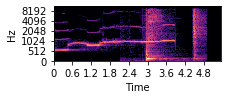

In [107]:
visualize_input(sample_input, config, 'spectrogram')

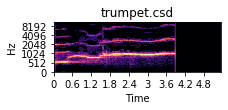

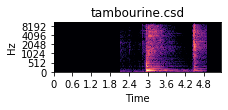

In [109]:
visualize_output(sample_gt, config, 'spectrogram', class_names=sample_components)

In [110]:
input_pcm = visualize_input(model_input[1].cpu(), config, 'pcm')
gt_pcms = visualize_output(model_output[1].cpu().detach(), config, 'pcm')

In [69]:
IPython.display.Audio(data=input_pcm, rate=config['dataset']['config']['sample_rate'])

In [13]:
IPython.display.Audio(data=gt_pcms[0], rate=config['dataset']['config']['sample_rate'])

In [14]:
IPython.display.Audio(data=gt_pcms[1], rate=config['dataset']['config']['sample_rate'])

visualize sample data

In [135]:
model = model.to(device)
optim = torch.optim.Adam(model.parameters(), lr=config['optimizer']['config']['lr'], betas=config['optimizer']['config']['betas'], eps=config['optimizer']['config']['epsilon'])

In [136]:
for e in range(config['model']['config']['max_epoch']):
    for i, batch in enumerate(val_dataloader):
        optim.zero_grad()
        model_input = batch['model_input'].to(device)
        ground_truths = batch['ground_truths'].to(device)

        model_output = model(model_input)
        
        class_names = [samples for samples in batch['component_info']]

        loss = loss_fn(model_input, model_output, ground_truths)
        loss.backward()
        optim.step()

    print(f"epoch {e} loss: {loss.item()}")

epoch 0 loss: 4485177409536.0
epoch 1 loss: 4271924576256.0
epoch 2 loss: 4133276090368.0
epoch 3 loss: 4055535714304.0
epoch 4 loss: 3982889844736.0
epoch 5 loss: 3948726452224.0
epoch 6 loss: 3923086147584.0
epoch 7 loss: 3871025922048.0
epoch 8 loss: 3863646044160.0


KeyboardInterrupt: 

In [92]:
print(model_input.size())

torch.Size([32, 2, 167, 129])


ModuleNotFoundError: No module named '__main__.train'; '__main__' is not a package

In [24]:
loss

tensor(8.5026e+12, grad_fn=<MeanBackward0>)

In [25]:
loss.backward()

In [283]:
preds = net(aggregate.to(device))
# preds = net(aggregate.to(device), ground_truths.to(device), None, subseq_mask)
print(aggregate.shape)
print(preds.shape)
# preds2, _ = net2(aggregate)

torch.Size([4, 460, 258])
torch.Size([4, 460, 2, 258])


In [268]:
cgts, revs = get_spects(preds.detach(), fs=fs, nperseg=nperseg, noverlap=noverlap, xid=xid)

(460, 258)
(129, 460)
(460, 258)
(129, 460)
